---
Title : Premiers tests d'équilibrage de la distribution des catégories  
Author : Dmitrašinović Théotime  
**But** :  
- Rééquilibrer le jeu de données en fonction du label youtube.  
Plusieurs tests sont réalisés.

Sur toutes les fonctions aléatoire le paramètre `random_state` est fixé à 42 pour s'assurer que les tests soient comparables.

Ultérieument les différentes techniques d'équilibrage sont redéfinies dans les notebooks de classification.

---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# petits tests

In [ ]:
MetaDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/endroit/"
VideoPath = "/content/gdrive/MyDrive/Projet_Multimedia/videos/"
AudioPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/Audio/"

CSVLabelisedDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv"

In [ ]:
from os import listdir
from os.path import isfile, join
MetaFiles = [f for f in listdir(MetaDataPath) if isfile(join(MetaDataPath, f))]
len(MetaFiles)

3056

In [ ]:
import pandas as pd
df = pd.read_csv(CSVLabelisedDataPath)
df

,name,label
0,-KHQk1_Vq69E,Autos & Vehicles
1,-mG4Y2Snygfk,People & Blogs
2,-OdEfx8up7wM,People & Blogs
3,-Opbfh4wNu7Q,Entertainment
4,-A5340xbbQJU,Sports
...,...,...
2275,-ymc30meWzfg,Education
2276,-h7HGWRTGqyg,Education
2277,-XVRLTfN1WYw,Howto & Style
2278,-jTtH7Fq1trw,Travel & Events


In [ ]:
# class to index mapping
class_to_idx = {label:i for i, label in enumerate(df.label.unique())}
class_to_idx

{'Autos & Vehicles': 0,
 'People & Blogs': 1,
 'Entertainment': 2,
 'Sports': 3,
 'Film & Animation': 4,
 'Comedy': 5,
 'Education': 6,
 'Howto & Style': 7,
 'Pets & Animals': 8,
 'Science & Technology': 9,
 'News & Politics': 10,
 'Travel & Events': 11,
 'Music': 12,
 'Nonprofits & Activism': 13,
 'Gaming': 14}

In [ ]:
df['label_id'] = [class_to_idx[label] for label in df.label]
df

,name,label,label_id
0,-KHQk1_Vq69E,Autos & Vehicles,0
1,-mG4Y2Snygfk,People & Blogs,1
2,-OdEfx8up7wM,People & Blogs,1
3,-Opbfh4wNu7Q,Entertainment,2
4,-A5340xbbQJU,Sports,3
...,...,...,...
2275,-ymc30meWzfg,Education,6
2276,-h7HGWRTGqyg,Education,6
2277,-XVRLTfN1WYw,Howto & Style,7
2278,-jTtH7Fq1trw,Travel & Events,11


In [ ]:
# index to class mapping : reverse of class to index mapping
idx_to_class = {v: k for k, v in class_to_idx.items()}
idx_to_class

{0: 'Autos & Vehicles',
 1: 'People & Blogs',
 2: 'Entertainment',
 3: 'Sports',
 4: 'Film & Animation',
 5: 'Comedy',
 6: 'Education',
 7: 'Howto & Style',
 8: 'Pets & Animals',
 9: 'Science & Technology',
 10: 'News & Politics',
 11: 'Travel & Events',
 12: 'Music',
 13: 'Nonprofits & Activism',
 14: 'Gaming'}

In [ ]:
def get_class_distribution(df):
  label_count = df.label.value_counts()
  count_dict = {k:label_count[k] for k,v in class_to_idx.items()}
  return count_dict

class_distrib = get_class_distribution(df)
class_distrib

{'Autos & Vehicles': 15,
 'People & Blogs': 340,
 'Entertainment': 301,
 'Sports': 21,
 'Film & Animation': 286,
 'Comedy': 95,
 'Education': 732,
 'Howto & Style': 137,
 'Pets & Animals': 53,
 'Science & Technology': 65,
 'News & Politics': 52,
 'Travel & Events': 32,
 'Music': 39,
 'Nonprofits & Activism': 95,
 'Gaming': 17}

In [ ]:
px.pie(df, names="label", title="Distribution des catégories Youtube")

Text(0.5, 1.0, 'Class Distribution of QuerYD')

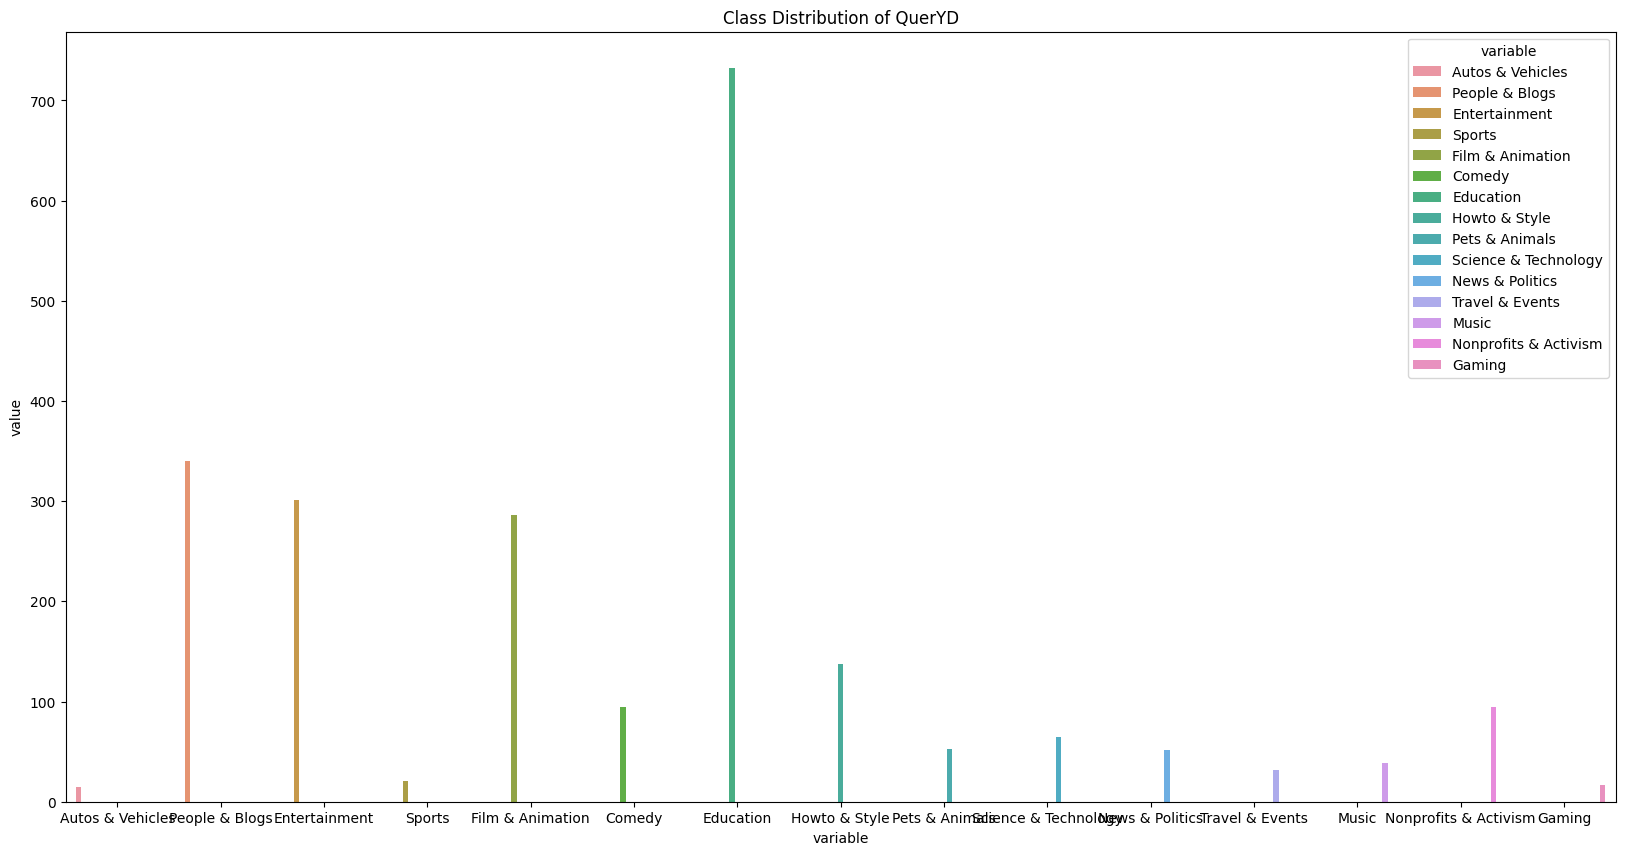

In [ ]:
# visualize the  class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(df)]).melt(),
            x = "variable", y="value", hue="variable").set_title('Class Distribution of QuerYD')

# Mise en commun de certains labels

In [ ]:
CSVLabelisedDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv"
import pandas as pd
import plotly.express as px
df = pd.read_csv(CSVLabelisedDataPath)

In [ ]:
df.label.unique()

array(['Autos & Vehicles', 'People & Blogs', 'Entertainment', 'Sports',
       'Film & Animation', 'Comedy', 'Education', 'Howto & Style',
       'Pets & Animals', 'Science & Technology', 'News & Politics',
       'Travel & Events', 'Music', 'Nonprofits & Activism', 'Gaming'],
      dtype=object)

In [ ]:
switch = {"Gaming":"Entertainment", "Travel & Events":"People & Blogs", "Autos & Vehicles":"", "Nonprofits & Activism": "News & Politics"}

## Labelisation à la main des catégories sous-représentées

In [ ]:
VideoPath = "/content/gdrive/MyDrive/Projet_Multimedia/videos/Video_with_label/"

In [ ]:
VideoPath + "video" + "-OUk4LxF5nzw.mp4"

'/content/gdrive/MyDrive/Projet_Multimedia/videos/Video_with_label/video-OUk4LxF5nzw.mp4'

In [ ]:
true_label = {"-KHQk1_Vq69E":"America Unemployement rate handicap",
              "-AwRAfxBub9M":"Film & Animation",
              "-1VM2eLhvsSM":"Pub Coca Cola",
              "-DfPMxdHZKsw":"Defi",
              "-XsVV0t_cS7Q":"Defi",
              "-nr1IhBX8m1w":"",
              "-OUk4LxF5nzw":"",
              "-GHDz-XDD8OU":"Pub Dorito",
              "-PXJnZMF3ucc":"Defi",
              "-CeN6PMEOQEA":"Defi",
              "-q6rAllJAdWk":"Defi",
              "-VGb1wgIkPEw":"Autos & Vehicles",
              "-C7uAB94aRrQ":"Pub auto",
              "-jHCA59ia_NE":"control routier RU",
              "-VsJKPdOuzZw":"Comedy",
              "":"",
              "":"",
              "-A5340xbbQJU":"Sport",
              "-ynUw0YsrmSg":"Sport",
              "-1WpStml5fe8":"Sport",
              "-MdEV-jWMGWw":"Demande mariage avion",
              "-J_dBkatloPk":"",
              "-zgg9jE1jXjg":"",
              "-bqxxtxXWMsM":"Sport",
              "-wx-kvJlKvJI":"Pub Sport",
              "-cMV_gvBwL1g":"Sport",
              "---YU8YcWeUU":"Sport",
              "-Gr8Vk4O11LM":"Sport",
              "-5xJ6h6OTveU":"Sport",
              "-kPm0_jB5EQI":"Sport",
              "-QFMMD4JwTwM":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",
              "":"",

              }

In [ ]:
sous_pres = ['Autos & Vehicles', 'Sports', 'Music', 'Pets & Animals', 'Science & Technology']
name = []
for elem in sous_pres:
  name.append(df[df['label'] == elem])
name

[              name             label
 0     -KHQk1_Vq69E  Autos & Vehicles
 65    -AwRAfxBub9M  Autos & Vehicles
 133   -1VM2eLhvsSM  Autos & Vehicles
 254   -DfPMxdHZKsw  Autos & Vehicles
 441   -XsVV0t_cS7Q  Autos & Vehicles
 555   -nr1IhBX8m1w  Autos & Vehicles
 805   -C7uAB94aRrQ  Autos & Vehicles
 1216  -OUk4LxF5nzw  Autos & Vehicles
 1303  -jHCA59ia_NE  Autos & Vehicles
 1482  -GHDz-XDD8OU  Autos & Vehicles
 1591  -PXJnZMF3ucc  Autos & Vehicles
 1774  -CeN6PMEOQEA  Autos & Vehicles
 2010  -q6rAllJAdWk  Autos & Vehicles
 2086  -VGb1wgIkPEw  Autos & Vehicles
 2143  -VsJKPdOuzZw  Autos & Vehicles,
               name   label
 4     -A5340xbbQJU  Sports
 14    -ynUw0YsrmSg  Sports
 123   -1WpStml5fe8  Sports
 353   -MdEV-jWMGWw  Sports
 483   -J_dBkatloPk  Sports
 565   -zgg9jE1jXjg  Sports
 568   -bqxxtxXWMsM  Sports
 602   -wx-kvJlKvJI  Sports
 644   -cMV_gvBwL1g  Sports
 1055  ---YU8YcWeUU  Sports
 1066  -Gr8Vk4O11LM  Sports
 1097  -5xJ6h6OTveU  Sports
 1191  -kPm0_jB5EQI  Sports

# SciKit Learn

In [ ]:
CSVLabelisedDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv"
import pandas as pd
import plotly.express as px
df = pd.read_csv(CSVLabelisedDataPath)
px.pie(df, names="label", title="Distribution des catégories Youtube")

## On garde X et y sur le même DataFrame

In [ ]:
from sklearn.model_selection import train_test_split
def split_TTV(df):
  # Split the data into train, test, and validation sets while maintaining the class distribution
  # Adjust the test_size and random_state parameters as needed
  train, temp = train_test_split(df, train_size=0.6, stratify=df.label, random_state=42)
  test, val = train_test_split(temp, test_size=0.5, stratify=temp.label, random_state=42)

  # You can access the subsets like this
  print("Training set:", train.shape)
  print("Testing set:", test.shape)
  print("Validation set:", val.shape)

  return train, test, val


import numpy as np
# faire en sorte que chaque copie d'un individu soient dans le même set
def surSampling(df, seuil=4):
  vc = df['label'].value_counts()
  seuil = int(np.ceil(len(df)*seuil))
  label_sous_repr = vc[vc < seuil].index

  # créer une copie du df auquel on rajoute des nouveaux individus
  balanced_df = df.copy(deep=True)
  for label in label_sous_repr:
    label_data = df[df['label'] == label]
    seuil = min(seuil, len(label_data)*3)
    to_add_subset = label_data.sample(seuil-len(label_data), replace=True, random_state=42)
    balanced_df = pd.concat([balanced_df, to_add_subset])
  return balanced_df


def surSamplingBasic(df, seuil=4):
  vc = df['label'].value_counts()
  sx2 = int(np.ceil(len(df)*0.02))
  lx2 = vc[vc < sx2].index
  sx3 = int(np.ceil(len(df)*0.05))
  lx3 = vc[vc < sx3].index
  # créer une copie du df auquel on rajoute des nouveaux individus
  balanced_df = df.copy(deep=True)
  for l in lx2:
    label_data = df[df['label'] == l]
    sx2 = min(len(label_data)*2, sx2)
    to_add_subset = label_data.sample(sx2-len(label_data), replace=True, random_state=42)
    balanced_df = pd.concat([balanced_df, to_add_subset])
  for l in lx3:
    label_data = df[df['label'] == l]
    sx3 = min(len(label_data)*3, sx3)
    to_add_subset = label_data.sample(sx3-len(label_data), replace=True, random_state=42)
    balanced_df = pd.concat([balanced_df, to_add_subset])
  return balanced_df

def split_and_sursampling(df, seuil=0.05):
  train, test, val = split_TTV(df)
  train = surSampling(train, seuil)
  test = surSampling(test, seuil)
  val = surSampling(val, seuil)
  return train, test, val


def split_and_sursampling2(df, seuil=0.05):
  train, test, val = split_TTV(df)
  train = surSamplingBasic(train, seuil)
  test = surSamplingBasic(test, seuil)
  val = surSamplingBasic(val, seuil)
  return train, test, val

In [ ]:
df[df['label']=='Education']

,name,label
12,-f2i1Ic1xe_o,Education
17,-1I8ICdOySkw,Education
19,-RVTOIJ4Q1DA,Education
28,-ebyf6FzKEiI,Education
29,-QI4huHzf3yQ,Education
...,...,...
2267,-68BKBSv91S8,Education
2268,-GT018Qejkhg,Education
2269,-ka8-Nefp_gk,Education
2275,-ymc30meWzfg,Education


In [ ]:
df

,name,label
0,-KHQk1_Vq69E,Autos & Vehicles
1,-mG4Y2Snygfk,People & Blogs
2,-OdEfx8up7wM,People & Blogs
3,-Opbfh4wNu7Q,Entertainment
4,-A5340xbbQJU,Sports
...,...,...
2275,-ymc30meWzfg,Education
2276,-h7HGWRTGqyg,Education
2277,-XVRLTfN1WYw,Howto & Style
2278,-jTtH7Fq1trw,Travel & Events


In [ ]:
def show_distrib2(df, train, test, val):
  df['set'] = 'original'
  train['set'] = 'train'
  test['set'] = 'test'
  val['set'] = 'validation'
  ALL = pd.concat([df, train, test, val])
  return ALL



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_distrib(df, labels):
  label_count = df.label.value_counts()
  return [label_count[k] for k in labels]

def show_distrib(df, train, test, val):
  labels = df.label.unique()
  # Figures
  fig = make_subplots(rows=1, cols=4,
                      specs=[[{"type": "domain"}, {"type": "domain"},
                      {"type": "domain"}, {"type": "domain"}]],
                      subplot_titles=['Original', 'Train', 'Test', 'Validation'])

  fig.add_trace(go.Pie(labels=labels, values=get_distrib(df, labels), scalegroup='one'), 1, 1)
  fig.add_trace(go.Pie(labels=labels, values=get_distrib(train, labels), scalegroup='one'), 1, 2)
  fig.add_trace(go.Pie(labels=labels, values=get_distrib(test, labels), scalegroup='one'), 1, 3)
  fig.add_trace(go.Pie(labels=labels, values=get_distrib(val, labels), scalegroup='one'), 1, 4)

  fig.update_layout(title_text='Distribution des catégories Youtube des différents datasets')
  fig.show()

In [ ]:
CSVLabelisedDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv"
df = pd.read_csv(CSVLabelisedDataPath)
train, test, val = split_TTV(df)
show_distrib(df, train, test, val)

Training set: (1368, 2)
Testing set: (456, 2)
Validation set: (456, 2)


In [ ]:
#GOOD
CSVLabelisedDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv"
df = pd.read_csv(CSVLabelisedDataPath)
train, test, val = split_and_sursampling(df, seuil=4)
show_distrib(df, train, test, val)

Training set: (1368, 2)
Testing set: (456, 2)
Validation set: (456, 2)


In [ ]:
CSVLabelisedDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv"
df = pd.read_csv(CSVLabelisedDataPath)
train, test, val = split_and_sursampling2(df, seuil=4)
show_distrib(df, train, test, val)


Training set: (1368, 2)
Testing set: (456, 2)
Validation set: (456, 2)


In [ ]:
# vérification de l'intersection vide
print(set(train.name.unique()).intersection(set(test.name.unique())))
print(set(train.name.unique()).intersection(set(val.name.unique())))
print(set(test.name.unique()).intersection(set(val.name.unique())))

set()
set()
set()


In [ ]:
OutPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/DataSets/"
train.to_csv(OutPath + "Train_SurSampling1.csv", index=False)
test.to_csv(OutPath + "Test_SurSampling1.csv", index=False)
val.to_csv(OutPath + "Val_SurSampling1.csv", index=False)

In [ ]:
train.name.unique

<bound method Series.unique of 892     --wHytb5Fe2k
209     -KsEOupmYmF0
997     -TU6VrllUQjw
42      -A9vuHxP734U
1805    -C6a9AQY_srk
            ...     
2143    -VsJKPdOuzZw
1774    -CeN6PMEOQEA
65      -AwRAfxBub9M
2086    -VGb1wgIkPEw
2143    -VsJKPdOuzZw
Name: name, Length: 1909, dtype: object>

In [ ]:
set(test.name.unique()).intersection(set(train.name.unique()))

set()

In [ ]:
ALL = show_distrib2(df.copy(), train.copy(), test.copy(), val.copy())
px.bar(ALL, x="label", color="set", barmode="group", facet_col="set")

---
***BUT***   
SurSampler les catégories dont la part est inférieure à 5 %.  
SousSampler la catégorie 'Education'.

---

### Equilibrage du DataSet

In [ ]:
CSVLabelisedDataPath = "/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv"

df = pd.read_csv(CSVLabelisedDataPath)
# Calculate class distribution
class_distribution = df['label'].value_counts()
df

,name,label
0,-KHQk1_Vq69E,Autos & Vehicles
1,-mG4Y2Snygfk,People & Blogs
2,-OdEfx8up7wM,People & Blogs
3,-Opbfh4wNu7Q,Entertainment
4,-A5340xbbQJU,Sports
...,...,...
2275,-ymc30meWzfg,Education
2276,-h7HGWRTGqyg,Education
2277,-XVRLTfN1WYw,Howto & Style
2278,-jTtH7Fq1trw,Travel & Events


In [ ]:
2280*0.06


136.79999999999998

In [ ]:
# recup les catégories sous représentées
seuil=137
vc = df['label'].value_counts()
label_sous_repr = vc[vc < seuil].index

# Create a new DataFrame to store the balanced dataset
balanced_df = df.copy(deep=True)
for label in label_sous_repr:
  label_data = df[df['label'] == label]
  to_add_subset = label_data.sample(seuil-len(label_data), replace=True)
  balanced_df = pd.concat([balanced_df, to_add_subset])


In [ ]:
labelt = label_sous_repr[0]
print(label)
label_data = df[df['label'] == label]
to_add_subset = label_data.sample(seuil-len(label_data), replace=True)
to_add_subset.index

Autos & Vehicles


Int64Index([1591,  555, 1303,  555, 2086,  805, 1482,  441,    0,  555,
            ...
            2143, 1482,  555,    0, 2086,    0,  805,   65, 1216, 2143],
           dtype='int64', length=122)

In [ ]:
seuil=137
label_sous_repr = []
# Create a new DataFrame to store the balanced dataset
balanced_df = pd.DataFrame(columns=['name', 'label'])
# Iterate over unique labels
for label in df['label'].unique():
    label_data = df[df['label'] == label]
    # Randomly sample 'min_count' samples from each class
    balanced_subset = label_data.sample(min_count, replace=True)
    balanced_df = pd.concat([balanced_df, balanced_subset])

#### Test

In [ ]:
balanced_df

,name,label
0,-KHQk1_Vq69E,Autos & Vehicles
1,-mG4Y2Snygfk,People & Blogs
2,-OdEfx8up7wM,People & Blogs
3,-Opbfh4wNu7Q,Entertainment
4,-A5340xbbQJU,Sports
...,...,...
2143,-VsJKPdOuzZw,Autos & Vehicles
805,-C7uAB94aRrQ,Autos & Vehicles
441,-XsVV0t_cS7Q,Autos & Vehicles
555,-nr1IhBX8m1w,Autos & Vehicles


In [ ]:
train, test, val = split_TTV(balanced_df)
show_distrib(balanced_df, train, test, val)

Training set: (1899, 2)
Testing set: (633, 2)
Validation set: (634, 2)


# CSV avec durée

In [ ]:
CSVLabelisedDataPath = '/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/LVD.csv'


## Séparation X et y **(NON Utilisé)**

In [ ]:
# Separate the features (X) and labels (y)
X = df.drop(columns=['label'])
y = df['label']

# Split the data into train, test, and validation sets while maintaining the class distribution
# Adjust the test_size and random_state parameters as needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# You can access the subsets like this
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (1368, 2) (1368,)
Testing set: (456, 2) (456,)
Validation set: (456, 2) (456,)


# Weighted Random Sampler from Torch **(NON Utilisé)**

A weighted random sampler can ensure that each division of the original dataset contains samples in the different classes in equal proportions.

In [ ]:
import torch

In [ ]:
targets = torch.tensor(df.label_id)
targets

tensor([ 0,  1,  1,  ...,  7, 11,  9])

In [ ]:
class_count = [i for i in get_class_distribution(df).values()]
class_count

[15, 340, 301, 21, 286, 95, 732, 137, 53, 65, 52, 32, 39, 95, 17]

In [ ]:
# take the class counts and calculate the weights per class by taking the reciprocals
class_count = [i for i in get_class_distribution(df).values()]
class_weights = 1.0/torch.tensor(class_count, dtype=torch.float16)
print(class_weights)

tensor([0.0667, 0.0029, 0.0033, 0.0476, 0.0035, 0.0105, 0.0014, 0.0073, 0.0189,
        0.0154, 0.0192, 0.0312, 0.0256, 0.0105, 0.0588], dtype=torch.float16)


In [ ]:
class_weights_all = class_weights[targets]
class_weights_all

tensor([0.0667, 0.0029, 0.0029,  ..., 0.0073, 0.0312, 0.0154],
       dtype=torch.float16)

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler


In [ ]:
from torchvision import transforms, utils, datasets

In [ ]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

train_loader = DataLoader(dataset=df, shuffle=False, batch_size=8, sampler=weighted_sampler)

In [ ]:
train_loader